--- Logistic Regression using TV ---
Accuracy: 0.8750
AUC Score: 0.9271

Confusion Matrix:
[[20  4]
 [ 1 15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89        24
           1       0.79      0.94      0.86        16

    accuracy                           0.88        40
   macro avg       0.87      0.89      0.87        40
weighted avg       0.89      0.88      0.88        40



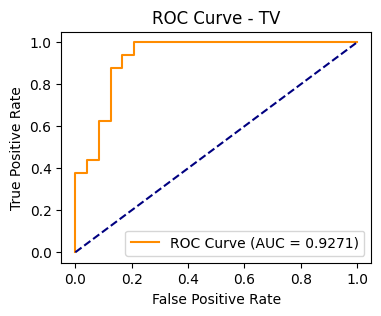

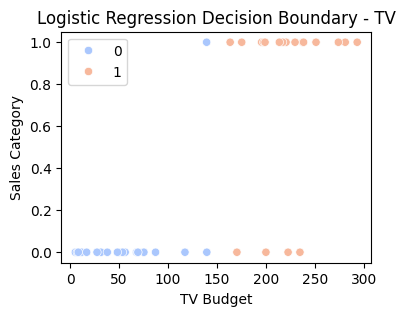

--- Logistic Regression using radio ---
Accuracy: 0.7000
AUC Score: 0.7552

Confusion Matrix:
[[14 10]
 [ 2 14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        24
           1       0.58      0.88      0.70        16

    accuracy                           0.70        40
   macro avg       0.73      0.73      0.70        40
weighted avg       0.76      0.70      0.70        40



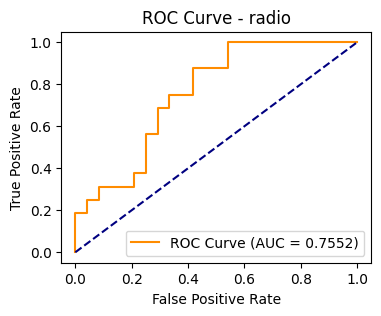

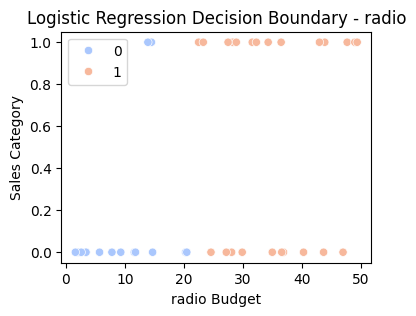

--- Logistic Regression using newspaper ---
Accuracy: 0.6250
AUC Score: 0.6172

Confusion Matrix:
[[14 10]
 [ 5 11]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.58      0.65        24
           1       0.52      0.69      0.59        16

    accuracy                           0.62        40
   macro avg       0.63      0.64      0.62        40
weighted avg       0.65      0.62      0.63        40



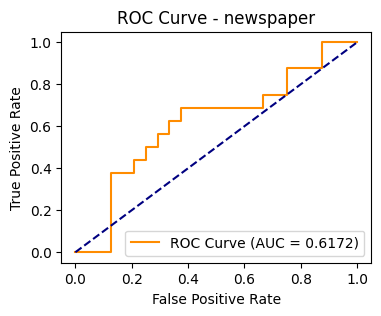

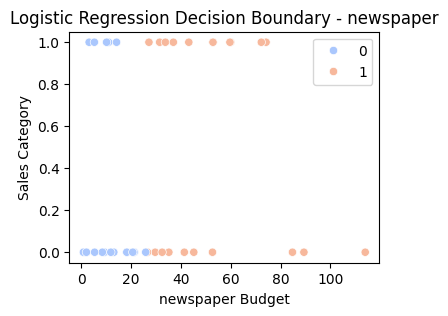

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
)

# Load the Advertising Data
url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
data = pd.read_csv(url)


# Let's categorize sales above the median as '1' (High) and below or equal as '0' (Low)
median_sales = data['sales'].median()
data['sales_category'] = np.where(data['sales'] > median_sales, 1, 0)

# Features and target variable
X = data[['TV', 'radio', 'newspaper']]
y = data['sales_category']

# Function to perform logistic regression on a single feature
def logistic_regression_analysis(feature_name):
    X_feature = data[[feature_name]]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X_feature, y, test_size=0.2, random_state=42
    )

    # Define and train the model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    # Print evaluation metrics
    print(f"--- Logistic Regression using {feature_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC Score: {auc:.4f}")
    print("\nConfusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(cr)

    # Plot ROC Curve
    plt.figure(figsize=(4, 3))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.4f})', color='darkorange')
    plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {feature_name}')
    plt.legend(loc='lower right')
    plt.show()

    # Plot data points and decision boundary
    plt.figure(figsize=(4,3))
    sns.scatterplot(x=X_test[feature_name], y=y_test, hue=y_pred, palette='coolwarm')
    plt.xlabel(f'{feature_name} Budget')
    plt.ylabel('Sales Category')
    plt.title(f'Logistic Regression Decision Boundary - {feature_name}')
    plt.show()

# Perform logistic regression analysis on each feature
for feature in ['TV', 'radio', 'newspaper']:
    logistic_regression_analysis(feature)
